## Problem Statement :
A US-based housing company named Surprise Housing has decided to enter the Australian market.
The company uses data analytics to purchase houses at a price below their actual values and flip them
at a higher price. For the same purpose, the company has collected a data set from the sale of houses
in Australia.The company is looking at prospective properties to buy to enter the market.

Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. In addition, the company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house

## 1. Read and Understand the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Libraries to read the data
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Read the data
df = pd.read_csv('train.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Backup of original data
org_df = df.copy()

In [5]:
# Inspection Code (to understand the data)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. EDA
### Univariate Analysis

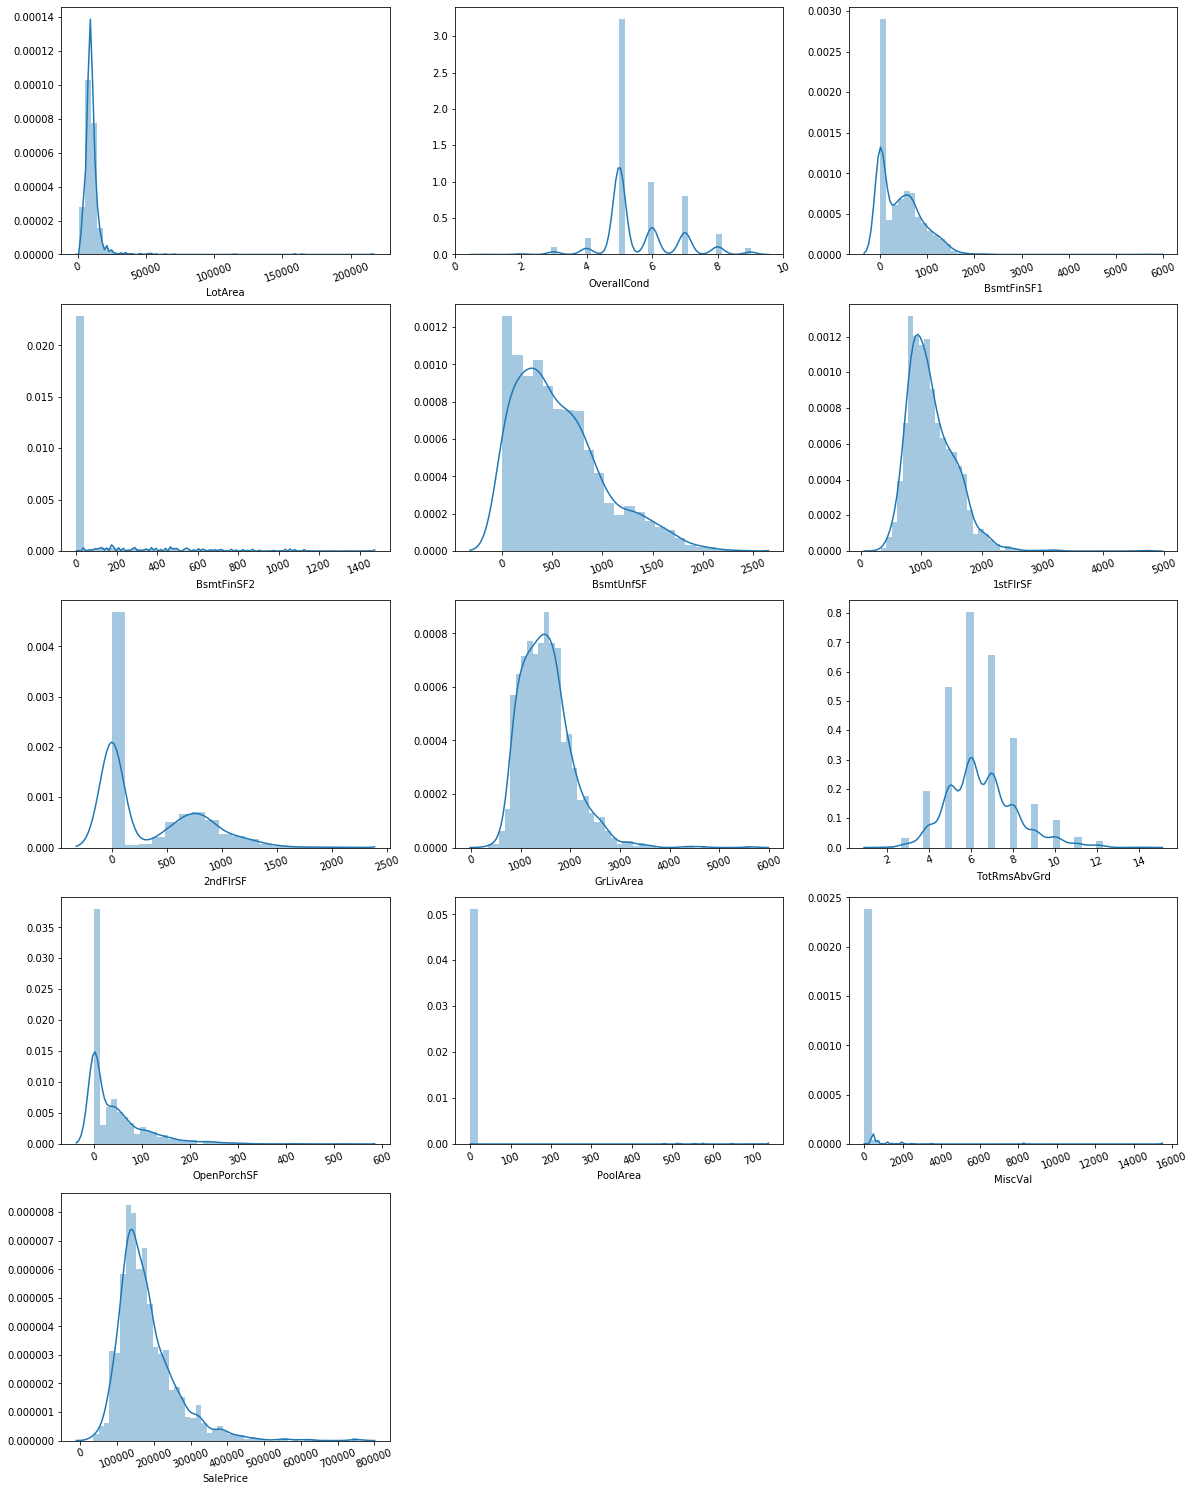

In [7]:
# Analyze using dist plots
plt.figure(figsize=(20,70))
features = ['LotArea','OverallCond','BsmtFinSF1','BsmtFinSF2',
            'BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','TotRmsAbvGrd','OpenPorchSF',
            'PoolArea','MiscVal','SalePrice']
for i in enumerate(features): 
    ax = plt.subplot(13, 3, i[0]+1)
    sns.distplot(df[i[1]])
    plt.xticks(rotation = 20)

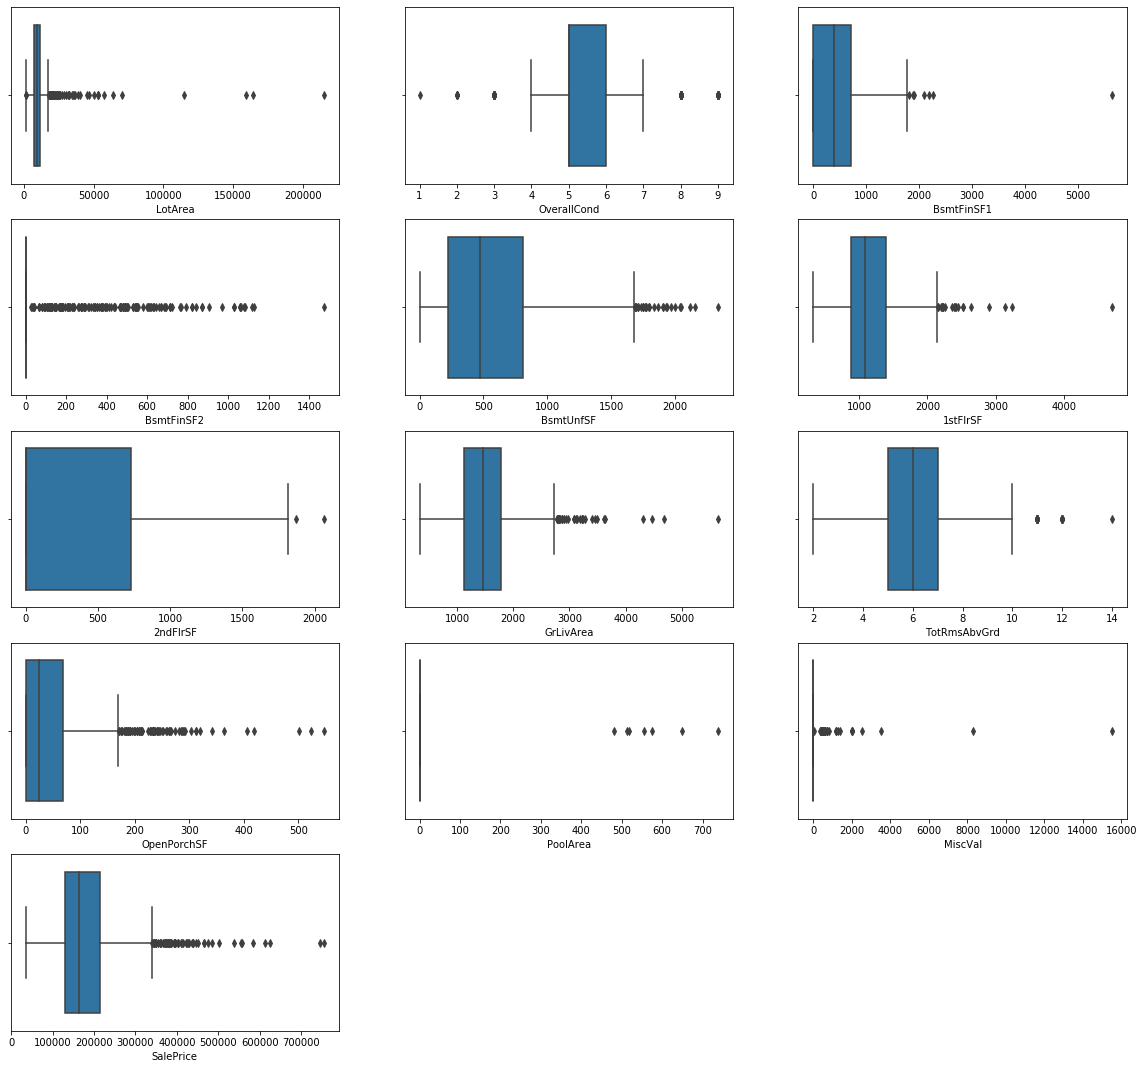

In [8]:
# Analyze using box plot
plt.figure(figsize=(20,50))
plt.subplot(13,3,1)
sns.boxplot(df['LotArea'])
plt.subplot(13,3,2)
sns.boxplot(df['OverallCond'])
plt.subplot(13,3,3)
sns.boxplot(df['BsmtFinSF1'])
plt.subplot(13,3,4)
sns.boxplot(df['BsmtFinSF2'])
plt.subplot(13,3,5)
sns.boxplot(df['BsmtUnfSF'])
plt.subplot(13,3,6)
sns.boxplot(df['1stFlrSF'])
plt.subplot(13,3,7)
sns.boxplot(df['2ndFlrSF'])
plt.subplot(13,3,8)
sns.boxplot(df['GrLivArea'])
plt.subplot(13,3,9)
sns.boxplot(df['TotRmsAbvGrd'])
plt.subplot(13,3,10)
sns.boxplot(df['OpenPorchSF'])
plt.subplot(13,3,11)
sns.boxplot(df['PoolArea'])
plt.subplot(13,3,12)
sns.boxplot(df['MiscVal'])
plt.subplot(13,3,13)
sns.boxplot(df['SalePrice'])
plt.show()

### Bivariate Analysis

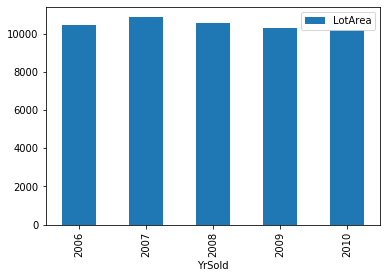

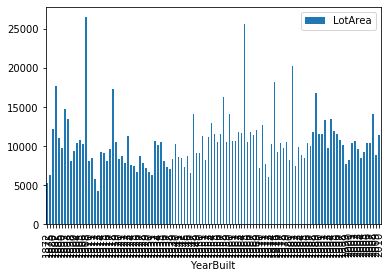

In [9]:
# Bar plot to compare Sold year and Built year on the basis of sale xone classification
df[['LotArea','YrSold']].groupby('YrSold').mean().plot(kind = 'bar')
df[['LotArea','YearBuilt']].groupby('YearBuilt').mean().plot(kind = 'bar')

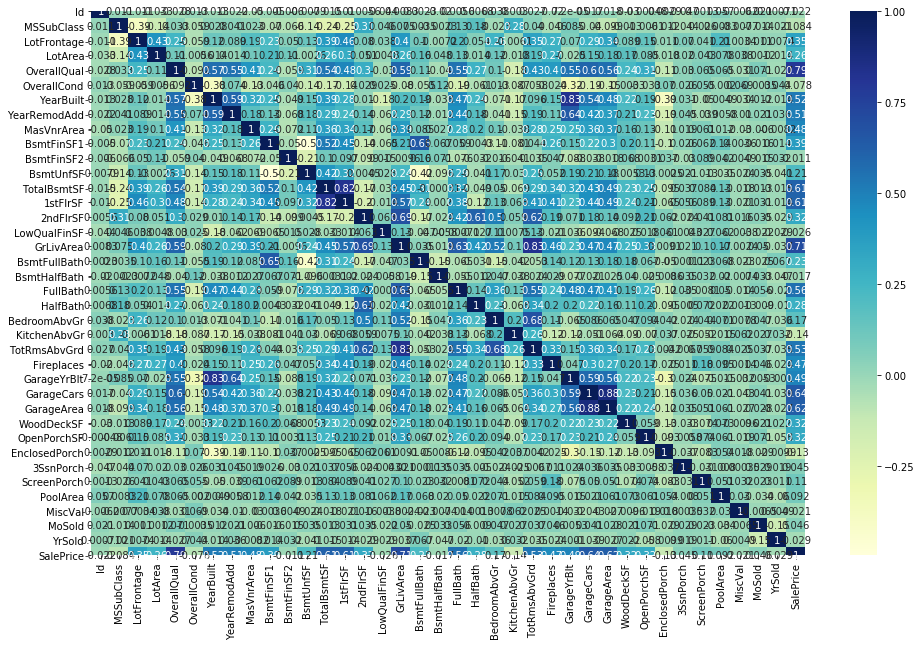

In [10]:
# Correlation between variables in dataframe

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

## 3. Data Cleaning

#### Datatype correction

In [11]:
# changing datatyppe of numeric columns 
df['MSSubClass']=df['MSSubClass'].astype('object')
df['OverallQual']=df['OverallQual'].astype('object')
df['OverallCond']=df['OverallCond'].astype('object')
df['BsmtFullBath']=df['BsmtFullBath'].astype('object')
df['BsmtHalfBath']=df['BsmtHalfBath'].astype('object')
df['FullBath']=df['FullBath'].astype('object')
df['HalfBath']=df['HalfBath'].astype('object')
df['BedroomAbvGr']=df['BedroomAbvGr'].astype('object')
df['KitchenAbvGr']=df['KitchenAbvGr'].astype('object')
df['TotRmsAbvGrd']=df['TotRmsAbvGrd'].astype('object')
df['Fireplaces']=df['Fireplaces'].astype('object')
df['GarageCars']=df['GarageCars'].astype('object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 no

#### Drop Columns with null percentage greater than 45%

In [13]:
# Null percentage
round(100*df.isnull().sum()/len(df.index),4)

Id                0.0000
MSSubClass        0.0000
MSZoning          0.0000
LotFrontage      17.7397
LotArea           0.0000
Street            0.0000
Alley            93.7671
LotShape          0.0000
LandContour       0.0000
Utilities         0.0000
LotConfig         0.0000
LandSlope         0.0000
Neighborhood      0.0000
Condition1        0.0000
Condition2        0.0000
BldgType          0.0000
HouseStyle        0.0000
OverallQual       0.0000
OverallCond       0.0000
YearBuilt         0.0000
YearRemodAdd      0.0000
RoofStyle         0.0000
RoofMatl          0.0000
Exterior1st       0.0000
Exterior2nd       0.0000
MasVnrType        0.5479
MasVnrArea        0.5479
ExterQual         0.0000
ExterCond         0.0000
Foundation        0.0000
BsmtQual          2.5342
BsmtCond          2.5342
BsmtExposure      2.6027
BsmtFinType1      2.5342
BsmtFinSF1        0.0000
BsmtFinType2      2.6027
BsmtFinSF2        0.0000
BsmtUnfSF         0.0000
TotalBsmtSF       0.0000
Heating           0.0000


In [14]:
# Drop columns with null percentage greater than 45%
df = df[df.columns[df.isnull().mean() < 0.45]]
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [15]:
df.shape

(1460, 76)

#### Drop highly skewed columns

In [16]:
#Extracting the categorical data to know the value counts
categorical=df[['MSSubClass', 'MSZoning','Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond','RoofStyle','RoofMatl', 'Exterior1st', 
        'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'Heating', 'HeatingQC',
         'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
         'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
       'CentralAir', 'Electrical','KitchenQual','Functional','GarageType','GarageYrBlt'
        ,'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']].copy()

In [17]:
def val_cnt(x):
    print('\n')
    print(x.value_counts(normalize=True,dropna=False))
categorical.apply(val_cnt)



20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64


RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64


Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64


Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64


Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64


AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64


Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64


Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64


NAmes      0.154110
CollgCr    0.102740
Ol

MSSubClass       None
MSZoning         None
Street           None
LotShape         None
LandContour      None
Utilities        None
LotConfig        None
LandSlope        None
Neighborhood     None
Condition1       None
Condition2       None
BldgType         None
HouseStyle       None
OverallQual      None
OverallCond      None
RoofStyle        None
RoofMatl         None
Exterior1st      None
Exterior2nd      None
MasVnrType       None
ExterQual        None
ExterCond        None
Foundation       None
BsmtQual         None
BsmtCond         None
BsmtExposure     None
BsmtFinType1     None
BsmtFinType2     None
Heating          None
HeatingQC        None
BsmtFullBath     None
BsmtHalfBath     None
FullBath         None
HalfBath         None
BedroomAbvGr     None
KitchenAbvGr     None
TotRmsAbvGrd     None
Fireplaces       None
GarageCars       None
CentralAir       None
Electrical       None
KitchenQual      None
Functional       None
GarageType       None
GarageYrBlt      None
GarageFini

##### Following columns are highly skewed (greater than 0.8) and hence are dropped
- Street
- LandContour
- Utilities
- LandSlope
- Condition1
- Condition2
- BldgType
- RoofMatl
- ExterCond
- BsmtCond
- BsmtFinType2
- Heating
- CentralAir
- Electrical
- Functional
- GarageQual
- GarageCond
- PavedDrive
- SaleType
- SaleCondition
- BsmtHalfBath
- KitchenAbvGr

In [18]:
df.drop(['Street','LandContour','Utilities','LandSlope','Condition1','Condition2',
         'BldgType','RoofMatl','ExterCond','BsmtCond','BsmtFinType2','Heating',
         'CentralAir','Electrical','Functional','GarageQual','GarageCond',
         'PavedDrive','SaleType','SaleCondition','BsmtHalfBath','KitchenAbvGr'],axis=1,inplace=True)

In [19]:
# Drop columns which are extra with respect to business
df.drop(['Id'],axis=1,inplace=True)
df.drop(['MiscVal'],axis=1,inplace=True)
df.drop(['MoSold'],axis=1,inplace=True)

In [20]:
df.shape

(1460, 51)

#### Data Imputation

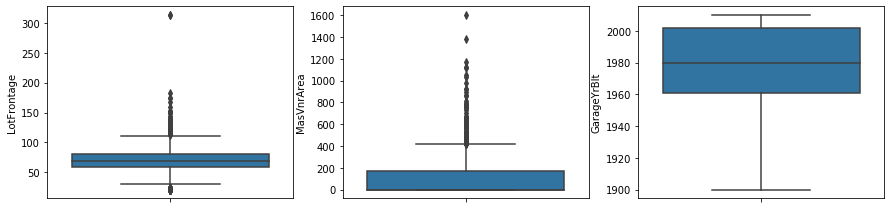

In [21]:
# Box plot analysis for numerical columns
plt.figure(figsize=(15,12))
plt.subplot(3,3,1)
sns.boxplot(y='LotFrontage',data=df)
plt.subplot(3,3,2)
sns.boxplot(y='MasVnrArea',data=df)
plt.subplot(3,3,3)
sns.boxplot(y='GarageYrBlt',data=df)
plt.show()

In [22]:
# Impute null values with mean and median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

Data Imputation for Categorical Columns

In [24]:
# Impute null values in 'MasVnrType' with mode
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('TA')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('Unf')
df['GarageType'] = df['GarageType'].fillna('NA')
df['GarageFinish'] = df['GarageFinish'].fillna('Unf')

from datetime import date
present_year=date.today()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(present_year.year)

In [25]:
# Check null value percentage
round(100*df.isnull().sum()/len(df.index),4)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
LotShape         0.0
LotConfig        0.0
Neighborhood     0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch  

In [26]:
# Datatype correction
df['GarageYrBlt']=df['GarageYrBlt'].astype('int64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
LotShape         1460 non-null object
LotConfig        1460 non-null object
Neighborhood     1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinType1     1460 non-null object
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460

In [28]:
# Combining rows in categorical columns to make the analysis more predictable

# Neighborhood
df['Neighborhood']=df['Neighborhood'].replace(['ClearCr','StoneBr','SWISU','Blmngtn',
                                               'MeadowV','BrDale','Veenker','NPkVill','Blueste'],'Others')

# HouseStyle
df['HouseStyle']=df['HouseStyle'].replace(['SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')

# OverallQual
df['OverallQual']=df['OverallQual'].replace([9,3,10,2,1],'Others')

# OverallCond
df['OverallCond']=df['OverallCond'].replace([9,2,1],'Others')

# RoofStyle
df['RoofStyle']=df['RoofStyle'].replace(['Flat','Gambrel','Mansard','Shed'],'Others')

# Exterior1st
df['Exterior1st']=df['Exterior1st'].replace(['WdShing','Stucco','AsbShng','Stone','BrkComm','AsphShn','CBlock','ImStucc'],'Others')

# Exterior2nd
df['Exterior2nd']=df['Exterior2nd'].replace(['Wd Shng','Stucco','BrkFace','AsbShng','ImStucc','Brk Cmn','Stone','AsphShn','CBlock ','Other'],'Others')

# ExterQual
df['ExterQual']=df['ExterQual'].replace(['Ex','Fa'],'Others')

# Foundation
df['Foundation']=df['Foundation'].replace(['Slab','Stone','Wood'],'Others')

# HeatingQC
df['HeatingQC']=df['HeatingQC'].replace(['Fa','Po'],'Others')

# KitchenQual
df['KitchenQual']=df['KitchenQual'].replace(['Ex','Fa'],'Others')

# GarageType
df['GarageType']=df['GarageType'].replace(['Basment','CarPort','2Types'],'Others')

# BedroomAbvGr
df['BedroomAbvGr']=df['BedroomAbvGr'].replace([1,5,6,0,8],'Others')

# TotRmsAbvGrd
df['TotRmsAbvGrd']=df['TotRmsAbvGrd'].replace([10,11,3,12,14,2],'Others')

# Fireplaces
df['Fireplaces']=df['Fireplaces'].replace([2,3],'Others')

# GarageCars
df['GarageCars']=df['GarageCars'].replace([0,4],'Others')

## 4. Data Preparation

### Check tagregt variable is normally distrubuted or not 
target variable is 'Sales price'

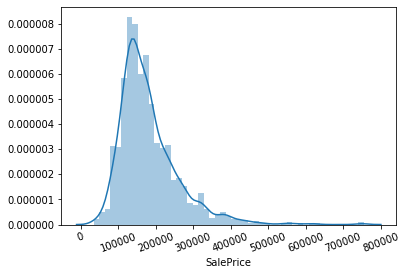

In [29]:
sns.distplot(df['SalePrice'], hist=True)
plt.xticks(rotation = 20)
plt.show()

In [30]:
print('Skewness before transformation : %f'%df['SalePrice'].skew())

Skewness before transformation : 1.882876


In [31]:
# Log Transformation to remove skewness in traget variable
df['SalePrice'] = np.log(df['SalePrice'])
print('Skewness after transformation : %f'%df['SalePrice'].skew())

Skewness after transformation : 0.121335


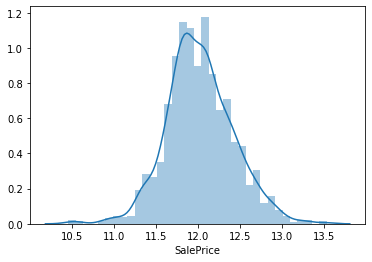

In [32]:
sns.distplot(df['SalePrice'], hist=True)
plt.show()

Target variable 'SalePrice' is normally distributed.

### Create dummy variables for categorical columns

In [33]:
# create dummy variable for MSSubClass

MSSubClass = pd.get_dummies(df.MSSubClass,drop_first=True)
MSSubClass.rename(columns = {30:'MSSubClass30',40:'MSSubClass40',45:'MSSubClass45',
                             50:'MSSubClass50',60:'MSSubClass60',70:'MSSubClass70',
                             75:'MSSubClass75',80:'MSSubClass80',85:'MSSubClass85',
                             90:'MSSubClass90',120:'MSSubClass120',160:'MSSubClass160'
                            ,180:'MSSubClass180',190:'MSSubClass190'}, inplace=True)
MSSubClass.head()

,MSSubClass30,MSSubClass40,MSSubClass45,MSSubClass50,MSSubClass60,MSSubClass70,MSSubClass75,MSSubClass80,MSSubClass85,MSSubClass90,MSSubClass120,MSSubClass160,MSSubClass180,MSSubClass190
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [34]:
# create dummy variable for MSZoning
MSZoning = pd.get_dummies(df.MSZoning,drop_first=True)
MSZoning.rename(columns = {'FV':'MSZoningFV','RH':'MSZoningRH','RL':'MSZoningRL',
                           'RM':'MSZoningRM'}, inplace=True)
MSZoning.head()

,MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [35]:
# create dummy variable for LotShape
LotShape = pd.get_dummies(df.LotShape,drop_first=True)
LotShape.rename(columns={'IR2':'LotShapeIR2','IR3':'LotShapeIR3','Reg':'LotShapeReg'},inplace=True)
LotShape.head()

,LotShapeIR2,LotShapeIR3,LotShapeReg
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,0


In [36]:
# create dummy variable for LotConfig
LotConfig = pd.get_dummies(df.LotConfig,drop_first=True)
LotConfig.rename(columns={'CulDSac':'LotConfigCulDSac','FR2':'LotConfigFR2','FR3':'LotConfigFR3',
                         'Inside':'LotConfigInside'},inplace=True)
LotConfig.head()

,LotConfigCulDSac,LotConfigFR2,LotConfigFR3,LotConfigInside
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,0
4,0,1,0,0


In [37]:
# create dummy variable for Neighborhood
Neighborhood = pd.get_dummies(df.Neighborhood,drop_first=True)
Neighborhood.rename(columns={'NAmes':'NeighborhoodNames','Others':'NeighborhoodOthers',
                            'CollgCr':'NeighborhoodCollgCr','OldTown':'NeighborhoodOldTown',
                             'Edwards':'NeighborhoodEdwards','Somerst':'NeighborhoodSomerst',
                             'Gilbert':'NeighborhoodGilbert','NridgHt':'NeighborhoodNridgHt',
                             'Sawyer':'NeighborhoodSawyer','NWAmes':'NeighborhoodNWAmes',
                             'SawyerW':'NeighborhoodSawyerW','BrkSide':'NeighborhoodBrkSide',
                             'Crawfor':'NeighborhoodCrawfor','Mitchel':'NeighborhoodMitchel',
                             'NoRidge':'NeighborhoodNoRidge','Timber':'NeighborhoodTimber',
                             'IDOTRR':'NeighborhoodIDOTRR'}, inplace=True)
Neighborhood.head()

,NeighborhoodCollgCr,NeighborhoodCrawfor,NeighborhoodEdwards,NeighborhoodGilbert,NeighborhoodIDOTRR,NeighborhoodMitchel,NeighborhoodNames,NeighborhoodNWAmes,NeighborhoodNoRidge,NeighborhoodNridgHt,NeighborhoodOldTown,NeighborhoodOthers,NeighborhoodSawyer,NeighborhoodSawyerW,NeighborhoodSomerst,NeighborhoodTimber
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [38]:
# create dummy variable for HouseStyle
HouseStyle=pd.get_dummies(df.HouseStyle,drop_first=True)
HouseStyle.rename(columns={'1Story':'HouseStyle_1Story','2Story':'HouseStyle_2Story',
                           'Others':'HouseStyle_Others'},inplace=True)
HouseStyle.head()

,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [39]:
# create dummies for OverallQual
OverallQual=pd.get_dummies(df.OverallQual,drop_first=True)
OverallQual.rename(columns={5:'OverallQual_5',6:'OverallQual_6',7:'OverallQual_7'
                           ,8:'OverallQual_8','Others':'OverallQual_Others'}, inplace=True)
OverallQual.head()

,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Others
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [40]:
# create dummies for OverallCond
OverallCond=pd.get_dummies(df.OverallCond,drop_first=True)
OverallCond.rename(columns={4:'OverallCond_4',5:'OverallCond_5',6:'OverallCond_6',7:'OverallCond_7',
                           8:'OverallCond_8','Others':'OverallCond_Others'},inplace=True)
OverallCond.head()

,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Others
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [41]:
# create dummies for RoofStyle
RoofStyle=pd.get_dummies(df.RoofStyle,drop_first=True)
RoofStyle.rename(columns={'Hip':'RoofStyleHip','Others':'RoofStyleOthers'},inplace=True)
RoofStyle.head()

,RoofStyleHip,RoofStyleOthers
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [42]:
# create dummies for Exterior1st
Exterior1st=pd.get_dummies(df.Exterior1st,drop_first=True)
Exterior1st.rename(columns={'CemntBd':'Exterior1stCemntBd', 'HdBoard': 'Exterior1stHdBoard', 
                            'MetalSd': 'Exterior1stMetalSd', 'Others': 'Exterior1stOthers', 
                            'Plywood': 'Exterior1stPlywood', 'VinylSd': 'Exterior1stVinylSd',
                            'Wd Sdng':'Exterior1stWd Sdng'},inplace=True)
Exterior1st.head()

,Exterior1stCemntBd,Exterior1stHdBoard,Exterior1stMetalSd,Exterior1stOthers,Exterior1stPlywood,Exterior1stVinylSd,Exterior1stWd Sdng
0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0


In [43]:
# create dummies for Exterior2nd
Exterior2nd=pd.get_dummies(df.Exterior2nd,drop_first=True)
Exterior2nd.rename(columns={'CmentBd':'Exterior2ndCmentBd', 'HdBoard': 'Exterior2ndHdBoard',
                            'MetalSd': 'Exterior2ndMetalSd', 'Others': 'Exterior2ndOthers',
                            'Plywood': 'Exterior2ndPlywood', 'VinylSd': 'Exterior2ndVinylSd',
                            'Wd Sdng':'Exterior2ndWd Sdng'},inplace=True)
Exterior2nd.head()

,Exterior2ndCmentBd,Exterior2ndHdBoard,Exterior2ndMetalSd,Exterior2ndOthers,Exterior2ndPlywood,Exterior2ndVinylSd,Exterior2ndWd Sdng
0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0


In [44]:
# create dummies for MasVnrType
MasVnrType=pd.get_dummies(df.MasVnrType,drop_first=True)
MasVnrType.rename(columns={'BrkFace':'MasVnrTypeBrkFace','None':'MasVnrTypeNone',
                           'Stone':'MasVnrTypeStone'},inplace=True)
MasVnrType.head()

,MasVnrTypeBrkFace,MasVnrTypeNone,MasVnrTypeStone
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [45]:
# create dummies for ExterQual
ExterQual=pd.get_dummies(df.ExterQual,drop_first=True)
ExterQual.rename(columns={'Others':'ExterQualOthers','TA':'ExterQualTA'},inplace=True)
ExterQual.head()

,ExterQualOthers,ExterQualTA
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [46]:
# create dummies for Foundation
Foundation=pd.get_dummies(df.Foundation,drop_first=True)
Foundation.rename(columns={'CBlock':'FoundationCBlock','Others':'FoundationOthers',
                           'PConc':'FoundationPConc'},inplace=True)
Foundation.head()

,FoundationCBlock,FoundationOthers,FoundationPConc
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,1


In [47]:
# create dummies for BsmtQual
BsmtQual=pd.get_dummies(df.BsmtQual,drop_first=True)
BsmtQual.rename(columns={'Fa':'BsmtQualFa','Gd':'BsmtQualGd','TA':'BsmtQualTA'},inplace=True)
BsmtQual.head()

,BsmtQualFa,BsmtQualGd,BsmtQualTA
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [48]:
# create dummies for BsmtExposure
BsmtExposure=pd.get_dummies(df.BsmtExposure,drop_first=True)
BsmtExposure.rename(columns={'Gd':'BsmtExposureGd','Mn':'BsmtExposureMn','NA':'BsmtExposureNA',
                            'No':'BsmtExposureNo'},inplace=True)
BsmtExposure.head()

,BsmtExposureGd,BsmtExposureMn,BsmtExposureNA,BsmtExposureNo
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,0


In [49]:
# create dummies for BsmtFinType1
BsmtFinType1 = pd.get_dummies(df.BsmtFinType1,drop_first=True)
BsmtFinType1.rename(columns={'BLQ':'BsmtFinType1BLQ','GLQ':'BsmtFinType1GLQ',
                             'LwQ':'BsmtFinType1LwQ','Rec':'BsmtFinType1Rec',
                            'Unf':'BsmtFinType1Unf'},inplace=True)
BsmtFinType1.head()

,BsmtFinType1BLQ,BsmtFinType1GLQ,BsmtFinType1LwQ,BsmtFinType1Rec,BsmtFinType1Unf
0,0,1,0,0,0
1,0,0,0,0,0
2,0,1,0,0,0
3,0,0,0,0,0
4,0,1,0,0,0


In [50]:
# create dummies for HeatingQC
HeatingQC=pd.get_dummies(df.HeatingQC,drop_first=True)
HeatingQC.rename(columns={'Gd':'HeatingQCGd','Others':'HeatingQCOthers','TA':'HeatingQCTA'},inplace=True)
HeatingQC.head()

,HeatingQCGd,HeatingQCOthers,HeatingQCTA
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,0,0,0


In [51]:
# create dummies for BsmtFullBath
BsmtFullBath=pd.get_dummies(df.BsmtFullBath,drop_first=True)
BsmtFullBath.rename(columns={1:'BsmtFullBath_1',2:'BsmtFullBath_2',3:'BsmtFullBath_3'},inplace=True)
BsmtFullBath.head()

,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3
0,1,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [52]:
# create dummies for FullBath
FullBath=pd.get_dummies(df.FullBath,drop_first=True)
FullBath.rename(columns={1:'FullBath_1',2:'FullBath_2',3:'FullBath_3'},inplace=True)
FullBath.head()

,FullBath_1,FullBath_2,FullBath_3
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [53]:
# create dummies for HalfBath
HalfBath=pd.get_dummies(df.HalfBath,drop_first=True)
HalfBath.rename(columns={1:'HalfBath_1',2:'HalfBath_2'},inplace=True)
HalfBath.head()

,HalfBath_1,HalfBath_2
0,1,0
1,0,0
2,1,0
3,0,0
4,1,0


In [54]:
# create dummies for BedroomAbvGr
BedroomAbvGr=pd.get_dummies(df.BedroomAbvGr,drop_first=True)
BedroomAbvGr.rename(columns={3:'BedroomAbvGr_3',4:'BedroomAbvGr_4',
                             'Others':'BedroomAbvGr_Others'},inplace=True)
BedroomAbvGr.head()

,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_Others
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [55]:
# create dummies for KitchenQual
KitchenQual=pd.get_dummies(df.KitchenQual,drop_first=True)
KitchenQual.rename(columns={'Others':'KitchenQualOthers','TA':'KitchenQualTA'},inplace=True)
KitchenQual.head()

,KitchenQualOthers,KitchenQualTA
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


In [56]:
# create dummies for TotRmsAbvGrd
TotRmsAbvGrd=pd.get_dummies(df.TotRmsAbvGrd,drop_first=True)
TotRmsAbvGrd.rename(columns={5:'TotRmsAbvGrd_5',6:'TotRmsAbvGrd_6',7:'TotRmsAbvGrd_7',
                            8:'TotRmsAbvGrd_8',9:'TotRmsAbvGrd_9','Others':'TotRmsAbvGrdOthers'},inplace=True)
TotRmsAbvGrd.head()

,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrdOthers
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0


In [57]:
# create dummies for Fireplaces
Fireplaces=pd.get_dummies(df.Fireplaces,drop_first=True)
Fireplaces.rename(columns={1:'Fireplaces_1','Others':'FireplacesOthers'},inplace=True)
Fireplaces.head()

,Fireplaces_1,FireplacesOthers
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0


In [58]:
# create dummies for GarageType
GarageType=pd.get_dummies(df.GarageType,drop_first=True)
GarageType.rename(columns={'BuiltIn':'GarageTypeBuiltIn','Detchd':'GarageTypeDetchd','NA':'GarageTypeNA',
                          'Others':'GarageTypeOthers'},inplace=True)
GarageType.head()

,GarageTypeBuiltIn,GarageTypeDetchd,GarageTypeNA,GarageTypeOthers
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,1,0,0
4,0,0,0,0


In [59]:
# create dummies for GarageFinish
GarageFinish=pd.get_dummies(df.GarageFinish,drop_first=True)
GarageFinish.rename(columns={'RFn':'GarageFinishRFn','Unf':'GarageFinishUnf'},inplace=True)
GarageFinish.head()

,GarageFinishRFn,GarageFinishUnf
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [60]:
#create dummies for GarageCars
GarageCars=pd.get_dummies(df.GarageCars,drop_first=True)
GarageCars.rename(columns={2:'GarageCars_2',3:'GarageCars_3','Others':'GarageCarsOthers'},inplace=True)
GarageCars.head()

,GarageCars_2,GarageCars_3,GarageCarsOthers
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [61]:
# Concat all dummy variables in the original dataframe
df = pd.concat([df,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,
                OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,
                BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,
                BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,
                GarageCars], axis = 1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice,MSSubClass30,MSSubClass40,MSSubClass45,MSSubClass50,MSSubClass60,MSSubClass70,MSSubClass75,MSSubClass80,MSSubClass85,MSSubClass90,MSSubClass120,MSSubClass160,MSSubClass180,MSSubClass190,MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,LotShapeIR2,LotShapeIR3,LotShapeReg,LotConfigCulDSac,LotConfigFR2,LotConfigFR3,LotConfigInside,NeighborhoodCollgCr,NeighborhoodCrawfor,NeighborhoodEdwards,NeighborhoodGilbert,NeighborhoodIDOTRR,NeighborhoodMitchel,NeighborhoodNames,NeighborhoodNWAmes,NeighborhoodNoRidge,NeighborhoodNridgHt,NeighborhoodOldTown,NeighborhoodOthers,NeighborhoodSawyer,NeighborhoodSawyerW,NeighborhoodSomerst,NeighborhoodTimber,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Others,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Others,RoofStyleHip,RoofStyleOthers,Exterior1stCemntBd,Exterior1stHdBoard,Exterior1stMetalSd,Exterior1stOthers,Exterior1stPlywood,Exterior1stVinylSd,Exterior1stWd Sdng,Exterior2ndCmentBd,Exterior2ndHdBoard,Exterior2ndMetalSd,Exterior2ndOthers,Exterior2ndPlywood,Exterior2ndVinylSd,Exterior2ndWd Sdng,MasVnrTypeBrkFace,MasVnrTypeNone,MasVnrTypeStone,ExterQualOthers,ExterQualTA,FoundationCBlock,FoundationOthers,FoundationPConc,BsmtQualFa,BsmtQualGd,BsmtQualTA,BsmtExposureGd,BsmtExposureMn,BsmtExposureNA,BsmtExposureNo,BsmtFinType1BLQ,BsmtFinType1GLQ,BsmtFinType1LwQ,BsmtFinType1Rec,BsmtFinType1Unf,HeatingQCGd,HeatingQCOthers,HeatingQCTA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_Others,KitchenQualOthers,KitchenQualTA,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrdOthers,Fireplaces_1,FireplacesOthers,GarageTypeBuiltIn,GarageTypeDetchd,GarageTypeNA,GarageTypeOthers,GarageFinishRFn,GarageFinishUnf,GarageCars_2,GarageCars_3,GarageCarsOthers
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,2,1,3,Gd,8,0,Attchd,2003,RFn,2,548,0,61,0,0,0,0,2008,12.247694,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Others,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,2,0,3,TA,6,1,Attchd,1976,RFn,2,460,298,0,0,0,0,0,2007,12.109011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,2,1,3,Gd,6,1,Attchd,2001,RFn,2,608,0,42,0,0,0,0,2008,12.317167,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Others,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1

In [62]:
df.shape

(1460, 175)

In [63]:
# Drop the columns whose dummy variables are created and added in the original dataframe
df.drop(['MSSubClass','MSZoning','LotShape','LotConfig','Neighborhood','HouseStyle','OverallQual',
         'OverallCond','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
         'Foundation','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','BsmtFullBath',
         'FullBath','HalfBath','BedroomAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces',
         'GarageType','GarageFinish','GarageCars'], axis = 1, inplace = True)
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice,MSSubClass30,MSSubClass40,MSSubClass45,MSSubClass50,MSSubClass60,MSSubClass70,MSSubClass75,MSSubClass80,MSSubClass85,MSSubClass90,MSSubClass120,MSSubClass160,MSSubClass180,MSSubClass190,MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,LotShapeIR2,LotShapeIR3,LotShapeReg,LotConfigCulDSac,LotConfigFR2,LotConfigFR3,LotConfigInside,NeighborhoodCollgCr,NeighborhoodCrawfor,NeighborhoodEdwards,NeighborhoodGilbert,NeighborhoodIDOTRR,NeighborhoodMitchel,NeighborhoodNames,NeighborhoodNWAmes,NeighborhoodNoRidge,NeighborhoodNridgHt,NeighborhoodOldTown,NeighborhoodOthers,NeighborhoodSawyer,NeighborhoodSawyerW,NeighborhoodSomerst,NeighborhoodTimber,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Others,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Others,RoofStyleHip,RoofStyleOthers,Exterior1stCemntBd,Exterior1stHdBoard,Exterior1stMetalSd,Exterior1stOthers,Exterior1stPlywood,Exterior1stVinylSd,Exterior1stWd Sdng,Exterior2ndCmentBd,Exterior2ndHdBoard,Exterior2ndMetalSd,Exterior2ndOthers,Exterior2ndPlywood,Exterior2ndVinylSd,Exterior2ndWd Sdng,MasVnrTypeBrkFace,MasVnrTypeNone,MasVnrTypeStone,ExterQualOthers,ExterQualTA,FoundationCBlock,FoundationOthers,FoundationPConc,BsmtQualFa,BsmtQualGd,BsmtQualTA,BsmtExposureGd,BsmtExposureMn,BsmtExposureNA,BsmtExposureNo,BsmtFinType1BLQ,BsmtFinType1GLQ,BsmtFinType1LwQ,BsmtFinType1Rec,BsmtFinType1Unf,HeatingQCGd,HeatingQCOthers,HeatingQCTA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_Others,KitchenQualOthers,KitchenQualTA,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrdOthers,Fireplaces_1,FireplacesOthers,GarageTypeBuiltIn,GarageTypeDetchd,GarageTypeNA,GarageTypeOthers,GarageFinishRFn,GarageFinishUnf,GarageCars_2,GarageCars_3,GarageCarsOthers
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003,548,0,61,0,0,0,0,2008,12.247694,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976,460,298,0,0,0,0,0,2007,12.109011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001,608,0,42,0,0,0,0,2008,12.317167,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1998,642,0,35,272,0,0,0,2006,11.849398,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000,836,192,84,0,0,0,0,2008,12.429216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0


In [64]:
df.shape

(1460, 147)

### Year columns
YearBuilt, YearRemodAdd, GarageYrBlt, YrSold are columns with year. Lets convert them into number of years to get better insights.

In [65]:
# Subtract the year present in columns to present year (2020)
from datetime import date
present_year=date.today()
df['YearBuilt']=df['YearBuilt'].apply(lambda x:present_year.year-x)
df['YearRemodAdd']=df['YearRemodAdd'].apply(lambda x:present_year.year-x)
df['GarageYrBlt']=df['GarageYrBlt'].apply(lambda x:present_year.year-x)
df['YrSold']=df['YrSold'].apply(lambda x:present_year.year-x)

## 5. Train-test split

In [66]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, 
                                               random_state = 100)

### Scaling on continous variable of training data
We are performing Min-Max Scaling

In [67]:
# min-max scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = df.loc[:, 'SalePrice']
X = df.loc[:, df.columns != 'SalePrice']

# Apply scaler()
scaler.fit(X)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,MSSubClass30,MSSubClass40,MSSubClass45,MSSubClass50,MSSubClass60,MSSubClass70,MSSubClass75,MSSubClass80,MSSubClass85,MSSubClass90,MSSubClass120,MSSubClass160,MSSubClass180,MSSubClass190,MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,LotShapeIR2,LotShapeIR3,LotShapeReg,LotConfigCulDSac,LotConfigFR2,LotConfigFR3,LotConfigInside,NeighborhoodCollgCr,NeighborhoodCrawfor,NeighborhoodEdwards,NeighborhoodGilbert,NeighborhoodIDOTRR,NeighborhoodMitchel,NeighborhoodNames,NeighborhoodNWAmes,NeighborhoodNoRidge,NeighborhoodNridgHt,NeighborhoodOldTown,NeighborhoodOthers,NeighborhoodSawyer,NeighborhoodSawyerW,NeighborhoodSomerst,NeighborhoodTimber,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Others,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Others,RoofStyleHip,RoofStyleOthers,Exterior1stCemntBd,Exterior1stHdBoard,Exterior1stMetalSd,Exterior1stOthers,Exterior1stPlywood,Exterior1stVinylSd,Exterior1stWd Sdng,Exterior2ndCmentBd,Exterior2ndHdBoard,Exterior2ndMetalSd,Exterior2ndOthers,Exterior2ndPlywood,Exterior2ndVinylSd,Exterior2ndWd Sdng,MasVnrTypeBrkFace,MasVnrTypeNone,MasVnrTypeStone,ExterQualOthers,ExterQualTA,FoundationCBlock,FoundationOthers,FoundationPConc,BsmtQualFa,BsmtQualGd,BsmtQualTA,BsmtExposureGd,BsmtExposureMn,BsmtExposureNA,BsmtExposureNo,BsmtFinType1BLQ,BsmtFinType1GLQ,BsmtFinType1LwQ,BsmtFinType1Rec,BsmtFinType1Unf,HeatingQCGd,HeatingQCOthers,HeatingQCTA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_Others,KitchenQualOthers,KitchenQualTA,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrdOthers,Fireplaces_1,FireplacesOthers,GarageTypeBuiltIn,GarageTypeDetchd,GarageTypeNA,GarageTypeOthers,GarageFinishRFn,GarageFinishUnf,GarageCars_2,GarageCars_3,GarageCarsOthers
0,65.0,8450,17,17,196.0,706,0,150,856,856,854,0,1710,17,548,0,61,0,0,0,0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,44,44,0.0,978,0,284,1262,1262,0,0,1262,44,460,298,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,19,18,162.0,486,0,434,920,920,866,0,1786,19,608,0,42,0,0,0,0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,105,50,0.0,216,0,540,756,961,756,0,1717,22,642,0,35,272,0,0,0,14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
4,84.0,14260,20,20,350.0,655,0,490,1145,1145,1053,0,2198,20,836,192,84,0,0,0,0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0


### Dividing into x and y for model building

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 1)

## 6. Model Building

#### RFE Approach to select top 50 features

In [70]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

## Ridge Regression

In [71]:
# Running RFE with the output number of the variable equal to 50
ridge=Ridge()
rfe = RFE(ridge, 50)
rfe = rfe.fit(X_train, y_train)

In [72]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 76),
 ('LotArea', False, 97),
 ('YearBuilt', False, 73),
 ('YearRemodAdd', False, 68),
 ('MasVnrArea', False, 96),
 ('BsmtFinSF1', False, 93),
 ('BsmtFinSF2', False, 87),
 ('BsmtUnfSF', False, 95),
 ('TotalBsmtSF', False, 94),
 ('1stFlrSF', False, 89),
 ('2ndFlrSF', False, 88),
 ('LowQualFinSF', False, 90),
 ('GrLivArea', False, 78),
 ('GarageYrBlt', False, 91),
 ('GarageArea', False, 92),
 ('WoodDeckSF', False, 86),
 ('OpenPorchSF', False, 85),
 ('EnclosedPorch', False, 82),
 ('3SsnPorch', False, 83),
 ('ScreenPorch', False, 79),
 ('PoolArea', False, 77),
 ('YrSold', False, 65),
 ('MSSubClass30', True, 1),
 ('MSSubClass40', False, 48),
 ('MSSubClass45', True, 1),
 ('MSSubClass50', False, 26),
 ('MSSubClass60', False, 64),
 ('MSSubClass70', False, 16),
 ('MSSubClass75', True, 1),
 ('MSSubClass80', False, 50),
 ('MSSubClass85', True, 1),
 ('MSSubClass90', False, 9),
 ('MSSubClass120', True, 1),
 ('MSSubClass160', True, 1),
 ('MSSubClass180', True, 1),
 ('MSSubCla

In [73]:
# Top 50 features selected using RFE
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass30', 'MSSubClass45', 'MSSubClass75', 'MSSubClass85',
       'MSSubClass120', 'MSSubClass160', 'MSSubClass180', 'MSZoningFV',
       'MSZoningRH', 'MSZoningRL', 'LotConfigCulDSac', 'NeighborhoodCrawfor',
       'NeighborhoodNoRidge', 'NeighborhoodNridgHt', 'OverallQual_7',
       'OverallQual_8', 'OverallCond_4', 'OverallCond_5', 'OverallCond_6',
       'OverallCond_7', 'OverallCond_8', 'OverallCond_Others',
       'RoofStyleOthers', 'Exterior1stHdBoard', 'Exterior1stMetalSd',
       'Exterior1stOthers', 'Exterior1stPlywood', 'Exterior1stVinylSd',
       'Exterior1stWd Sdng', 'Exterior2ndCmentBd', 'ExterQualTA',
       'FoundationPConc', 'BsmtQualFa', 'BsmtQualGd', 'BsmtQualTA',
       'BsmtExposureGd', 'BsmtExposureNA', 'BsmtFinType1Unf',
       'HeatingQCOthers', 'FullBath_1', 'FullBath_3', 'HalfBath_1',
       'KitchenQualOthers', 'Fireplaces_1', 'FireplacesOthers', 'GarageTypeNA',
       'GarageTypeOthers', 'GarageCars_2', 'GarageCars_3', 'GarageCarsOthers'],
     

In [74]:
# Features which are not included in top 50
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'YrSold', 'MSSubClass40', 'MSSubClass50',
       'MSSubClass60', 'MSSubClass70', 'MSSubClass80', 'MSSubClass90',
       'MSSubClass190', 'MSZoningRM', 'LotShapeIR2', 'LotShapeIR3',
       'LotShapeReg', 'LotConfigFR2', 'LotConfigFR3', 'LotConfigInside',
       'NeighborhoodCollgCr', 'NeighborhoodEdwards', 'NeighborhoodGilbert',
       'NeighborhoodIDOTRR', 'NeighborhoodMitchel', 'NeighborhoodNames',
       'NeighborhoodNWAmes', 'NeighborhoodOldTown', 'NeighborhoodOthers',
       'NeighborhoodSawyer', 'NeighborhoodSawyerW', 'NeighborhoodSomerst',
       'NeighborhoodTimber', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'HouseStyle_Others', 'OverallQual_5', 'Ove

In [75]:
# Creating X_train dataframe with RFE selected variables
X_train_1 = X_train[col]
X_train_1.head()

,MSSubClass30,MSSubClass45,MSSubClass75,MSSubClass85,MSSubClass120,MSSubClass160,MSSubClass180,MSZoningFV,MSZoningRH,MSZoningRL,LotConfigCulDSac,NeighborhoodCrawfor,NeighborhoodNoRidge,NeighborhoodNridgHt,OverallQual_7,OverallQual_8,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Others,RoofStyleOthers,Exterior1stHdBoard,Exterior1stMetalSd,Exterior1stOthers,Exterior1stPlywood,Exterior1stVinylSd,Exterior1stWd Sdng,Exterior2ndCmentBd,ExterQualTA,FoundationPConc,BsmtQualFa,BsmtQualGd,BsmtQualTA,BsmtExposureGd,BsmtExposureNA,BsmtFinType1Unf,HeatingQCOthers,FullBath_1,FullBath_3,HalfBath_1,KitchenQualOthers,Fireplaces_1,FireplacesOthers,GarageTypeNA,GarageTypeOthers,GarageCars_2,GarageCars_3,GarageCarsOthers
632,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
208,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
83,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0
1174,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1


In [76]:
X_train_1.shape

(1022, 50)

In [77]:
# Creating Test X_test dataframe with RFE selected variables
X_test_1 = X_test[col]
X_test_1.head()

,MSSubClass30,MSSubClass45,MSSubClass75,MSSubClass85,MSSubClass120,MSSubClass160,MSSubClass180,MSZoningFV,MSZoningRH,MSZoningRL,LotConfigCulDSac,NeighborhoodCrawfor,NeighborhoodNoRidge,NeighborhoodNridgHt,OverallQual_7,OverallQual_8,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Others,RoofStyleOthers,Exterior1stHdBoard,Exterior1stMetalSd,Exterior1stOthers,Exterior1stPlywood,Exterior1stVinylSd,Exterior1stWd Sdng,Exterior2ndCmentBd,ExterQualTA,FoundationPConc,BsmtQualFa,BsmtQualGd,BsmtQualTA,BsmtExposureGd,BsmtExposureNA,BsmtFinType1Unf,HeatingQCOthers,FullBath_1,FullBath_3,HalfBath_1,KitchenQualOthers,Fireplaces_1,FireplacesOthers,GarageTypeNA,GarageTypeOthers,GarageCars_2,GarageCars_3,GarageCarsOthers
258,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
267,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
288,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
649,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1233,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0


In [78]:
X_test_1.shape

(438, 50)

In [79]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [80]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005200,0.002619,0.000759,0.000933,0.0001,{'alpha': 0.0001},-0.115952,-0.106166,-0.125445,-0.111640,-0.109670,-0.113769,0.006635,14,-0.104110,-0.106108,-0.101770,-0.106087,-0.105638,-0.104743,0.001656
1,0.004606,0.001365,0.002615,0.001657,0.001,{'alpha': 0.001},-0.115952,-0.106164,-0.125446,-0.111640,-0.109655,-0.113766,0.006638,13,-0.104110,-0.106108,-0.101770,-0.106087,-0.105640,-0.104743,0.001656
2,0.006369,0.003061,0.000903,0.001115,0.01,{'alpha': 0.01},-0.115956,-0.106146,-0.125463,-0.111642,-0.109502,-0.113737,0.006667,12,-0.104109,-0.106108,-0.101772,-0.106091,-0.105655,-0.104747,0.001658
3,0.008930,0.002209,0.003810,0.004098,0.05,{'alpha': 0.05},-0.115983,-0.106067,-0.125556,-0.111649,-0.108887,-0.113623,0.006801,10,-0.104105,-0.106113,-0.101779,-0.106113,-0.105715,-0.104765,0.001667
4,0.006892,0.002637,0.003095,0.001488,0.1,{'alpha': 0.1},-0.116020,-0.105973,-0.125660,-0.111664,-0.108236,-0.113506,0.006954,7,-0.104102,-0.106127,-0.101790,-0.106142,-0.105790,-0.104790,0.001678


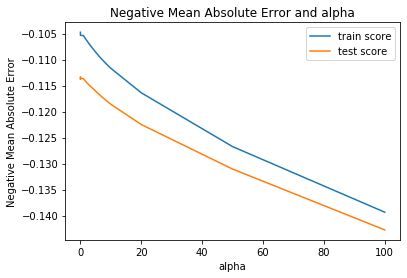

In [81]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### Optimal Aplha and MSE

In [82]:

print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.4}
-0.11337933241868038


In [83]:
# model with optimal alpha
# Ridge regression
lm1 = Ridge(alpha=0.4)
lm1.fit(X_train_1, y_train)

# predict
y_train_pred = lm1.predict(X_train_1)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm1.predict(X_test_1)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print(metrics.mean_squared_error(y_test,y_test_pred))

0.8582679777901459
0.8124716325060988
0.03544089093599595


In [84]:
# ridge model parameters
model_parameters = list(lm1.coef_)
model_parameters.insert(0, lm1.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_1.columns
cols = cols.insert(0, "constant")
sorted(list(zip( model_parameters,cols)),reverse=True)


[(11.942, 'constant'),
 (0.294, 'GarageCarsOthers'),
 (0.263, 'OverallCond_7'),
 (0.254, 'OverallCond_8'),
 (0.245, 'OverallCond_Others'),
 (0.229, 'FullBath_3'),
 (0.228, 'GarageCars_3'),
 (0.208, 'OverallCond_6'),
 (0.193, 'FireplacesOthers'),
 (0.188, 'MSSubClass75'),
 (0.171, 'OverallCond_5'),
 (0.162, 'MSZoningRH'),
 (0.161, 'NeighborhoodNridgHt'),
 (0.157, 'NeighborhoodCrawfor'),
 (0.149, 'OverallQual_8'),
 (0.129, 'NeighborhoodNoRidge'),
 (0.129, 'MSZoningFV'),
 (0.113, 'OverallCond_4'),
 (0.105, 'BsmtExposureGd'),
 (0.093, 'GarageCars_2'),
 (0.091, 'KitchenQualOthers'),
 (0.087, 'Fireplaces_1'),
 (0.078, 'MSZoningRL'),
 (0.077, 'OverallQual_7'),
 (0.072, 'LotConfigCulDSac'),
 (0.064, 'HalfBath_1'),
 (0.059, 'RoofStyleOthers'),
 (0.054, 'FoundationPConc'),
 (-0.057, 'MSSubClass45'),
 (-0.07, 'ExterQualTA'),
 (-0.074, 'Exterior2ndCmentBd'),
 (-0.077, 'MSSubClass85'),
 (-0.083, 'MSSubClass120'),
 (-0.088, 'BsmtFinType1Unf'),
 (-0.095, 'Exterior1stWd Sdng'),
 (-0.101, 'GarageTypeOt

## Lasso Regression

In [85]:
# RFE
lasso=Lasso()
rfe_lasso = RFE(lasso,50)
rfe_lasso=rfe.fit(X_train,y_train)

In [86]:
list(zip(X_train.columns,rfe_lasso.support_,rfe_lasso.ranking_))

[('LotFrontage', False, 76),
 ('LotArea', False, 97),
 ('YearBuilt', False, 73),
 ('YearRemodAdd', False, 68),
 ('MasVnrArea', False, 96),
 ('BsmtFinSF1', False, 93),
 ('BsmtFinSF2', False, 87),
 ('BsmtUnfSF', False, 95),
 ('TotalBsmtSF', False, 94),
 ('1stFlrSF', False, 89),
 ('2ndFlrSF', False, 88),
 ('LowQualFinSF', False, 90),
 ('GrLivArea', False, 78),
 ('GarageYrBlt', False, 91),
 ('GarageArea', False, 92),
 ('WoodDeckSF', False, 86),
 ('OpenPorchSF', False, 85),
 ('EnclosedPorch', False, 82),
 ('3SsnPorch', False, 83),
 ('ScreenPorch', False, 79),
 ('PoolArea', False, 77),
 ('YrSold', False, 65),
 ('MSSubClass30', True, 1),
 ('MSSubClass40', False, 48),
 ('MSSubClass45', True, 1),
 ('MSSubClass50', False, 26),
 ('MSSubClass60', False, 64),
 ('MSSubClass70', False, 16),
 ('MSSubClass75', True, 1),
 ('MSSubClass80', False, 50),
 ('MSSubClass85', True, 1),
 ('MSSubClass90', False, 9),
 ('MSSubClass120', True, 1),
 ('MSSubClass160', True, 1),
 ('MSSubClass180', True, 1),
 ('MSSubCla

In [87]:
col_lasso = X_train.columns[rfe_lasso.support_]
col_lasso

Index(['MSSubClass30', 'MSSubClass45', 'MSSubClass75', 'MSSubClass85',
       'MSSubClass120', 'MSSubClass160', 'MSSubClass180', 'MSZoningFV',
       'MSZoningRH', 'MSZoningRL', 'LotConfigCulDSac', 'NeighborhoodCrawfor',
       'NeighborhoodNoRidge', 'NeighborhoodNridgHt', 'OverallQual_7',
       'OverallQual_8', 'OverallCond_4', 'OverallCond_5', 'OverallCond_6',
       'OverallCond_7', 'OverallCond_8', 'OverallCond_Others',
       'RoofStyleOthers', 'Exterior1stHdBoard', 'Exterior1stMetalSd',
       'Exterior1stOthers', 'Exterior1stPlywood', 'Exterior1stVinylSd',
       'Exterior1stWd Sdng', 'Exterior2ndCmentBd', 'ExterQualTA',
       'FoundationPConc', 'BsmtQualFa', 'BsmtQualGd', 'BsmtQualTA',
       'BsmtExposureGd', 'BsmtExposureNA', 'BsmtFinType1Unf',
       'HeatingQCOthers', 'FullBath_1', 'FullBath_3', 'HalfBath_1',
       'KitchenQualOthers', 'Fireplaces_1', 'FireplacesOthers', 'GarageTypeNA',
       'GarageTypeOthers', 'GarageCars_2', 'GarageCars_3', 'GarageCarsOthers'],
     

In [88]:
# list of alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


# cross validation
model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso.fit(X_train[col_lasso], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [89]:
cv_results = pd.DataFrame(model_lasso.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018016,0.004899,0.003280,0.001440,0.0001,{'alpha': 0.0001},-0.116343,-0.105500,-0.126173,-0.112226,-0.107477,-0.113538,0.007354,1,-0.104063,-0.106196,-0.101853,-0.106220,-0.106055,-0.104877,0.001717
1,0.012758,0.005157,0.002967,0.002338,0.001,{'alpha': 0.001},-0.120403,-0.110897,-0.132448,-0.119524,-0.115471,-0.119741,0.007187,2,-0.109695,-0.113935,-0.109560,-0.112582,-0.112368,-0.111628,0.001720
2,0.007171,0.000854,0.002766,0.000494,0.01,{'alpha': 0.01},-0.149441,-0.150469,-0.172330,-0.146769,-0.152392,-0.154271,0.009199,3,-0.151317,-0.154280,-0.148345,-0.150913,-0.152921,-0.151555,0.002003
3,0.009831,0.004251,0.003115,0.000810,0.05,{'alpha': 0.05},-0.226654,-0.217625,-0.237957,-0.202363,-0.229338,-0.222786,0.012088,4,-0.221917,-0.221148,-0.216999,-0.223291,-0.222181,-0.221107,0.002166
4,0.006413,0.003405,0.003361,0.002146,0.1,{'alpha': 0.1},-0.297339,-0.273763,-0.289922,-0.255144,-0.296466,-0.282533,0.016087,5,-0.281406,-0.283506,-0.276411,-0.284655,-0.284497,-0.282095,0.003069


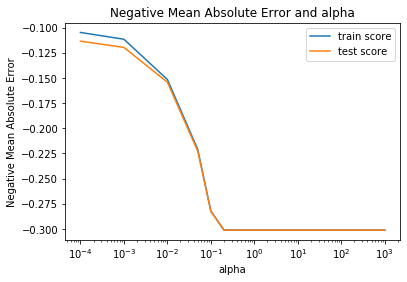

In [90]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### Optimal Alpha and MSE

In [91]:
print(model_lasso.best_params_)
print(model_lasso.best_score_)

{'alpha': 0.0001}
-0.1135383872481292


In [92]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.0001)
lm.fit(X_train[col_lasso], y_train)

# predict
y_train_pred = lm.predict(X_train[col_lasso])
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test[col_lasso])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print(metrics.mean_squared_error(y_test,y_test_pred))

0.8582021878786186
0.8128299765484732
0.035373167677413386


In [93]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train[col_lasso].columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)),reverse=True)

[(11.937, 'constant'),
 (0.332, 'GarageCarsOthers'),
 (0.255, 'OverallCond_7'),
 (0.247, 'OverallCond_8'),
 (0.237, 'OverallCond_Others'),
 (0.229, 'GarageCars_3'),
 (0.229, 'FullBath_3'),
 (0.2, 'OverallCond_6'),
 (0.194, 'FireplacesOthers'),
 (0.183, 'MSSubClass75'),
 (0.163, 'OverallCond_5'),
 (0.159, 'NeighborhoodNridgHt'),
 (0.158, 'MSZoningRH'),
 (0.156, 'NeighborhoodCrawfor'),
 (0.149, 'OverallQual_8'),
 (0.127, 'NeighborhoodNoRidge'),
 (0.127, 'MSZoningFV'),
 (0.105, 'BsmtExposureGd'),
 (0.102, 'OverallCond_4'),
 (0.093, 'GarageCars_2'),
 (0.092, 'KitchenQualOthers'),
 (0.087, 'Fireplaces_1'),
 (0.079, 'MSZoningRL'),
 (0.076, 'OverallQual_7'),
 (0.071, 'LotConfigCulDSac'),
 (0.064, 'HalfBath_1'),
 (0.054, 'RoofStyleOthers'),
 (0.054, 'FoundationPConc'),
 (-0.046, 'MSSubClass45'),
 (-0.06, 'Exterior2ndCmentBd'),
 (-0.071, 'ExterQualTA'),
 (-0.072, 'MSSubClass85'),
 (-0.08, 'MSSubClass120'),
 (-0.083, 'Exterior1stWd Sdng'),
 (-0.088, 'BsmtFinType1Unf'),
 (-0.091, 'Exterior1stViny

## 7. Conclusion 

### For Ridge - 
    - Alpha = 0.4
    - R2_score for train data = 85.82
    - R2_score for test data = 81.24
    - MSE = 0.0354 
    
    
### For Lasso - 
    - Alpha = 0.0001
    - R2_score for train data = 85.82
    - R2_score for test data = 81.28
    - MSE = 0.03543
    
 ### Top 10 features are - 
     1. GarageCarsOthers = Size of garage in terms of car capacity should be zero or greater than 3
     2. OverallCond_7 = preferred overall condition of the house is good
     3. OverallCond_8 = preferred overall condition of the house is very good
     4. OverallCond_Others = preferred overall condition of the house is excellent
     5. GarageCars_3 = Size of garage in car in terms of car capacity should be 3
     6. FullBath_3 = Full bathrooms above grade 3
     7. OverallCond_6 = the overall condition of the house which are above average
     8. FireplacesOthers = Number of fireplaces should be greater than one
     9. MSSubClass75 = preferred type of dwelling involved in the sale is 2-1/2 STORY ALL AGES
    10. OverallCond_5 = the overall condition of the house which are average


  